# Plan na dzisiaj
1. Motywacja
2. Podział danych
3. Skąd wziąć dane?
4. Przygotowanie danych
5. Zadanie

# Motywacja
- Zasada "Garbage in - garbage out"
- Im lepszej jakości dane - tym lepszy model
- Najlepsza architektura, najpotężniejsze zasoby obliczeniowe i najbardziej wyrafinowane metody nie pomogą, jeśli dane użyte do rozwoju modelu nie odpowiadają tym, z którymi będzie on używany, albo jeśli w danych nie będzie żadnych zależności
- Możemy stracić dużo czasu, energii i zasobów optymalizując nasz model w złym kierunku, jeśli dane są źle dobrane

# Źródła danych
- Gotowe zbiory:
 - Otwarte wyzwania (challenge)
 - Repozytoria otwartych zbiorów danych
 - Dane udostępniane przez firmy
 - Repozytoria zbiorów komercyjnych
 - Dane wewnętrzne (np. firmy)

# Źródła danych
- Tworzenie danych:
 - Generowanie syntetyczne
 - Crowdsourcing
 - Data scrapping
 - Ekstrakcja


## Otwarte wyzwania (shared task / challenge)
- Kaggle: https://www.kaggle.com/datasets
- Gonito: https://gonito.net/list-challenges - polski (+poznański +z UAM) Kaggle
- Semeval: https://semeval.github.io/ - zadania z semantyki
- Poleval: http://poleval.pl/ - przetwarzanie języka polskiego
- WMT http://www.statmt.org/wmt20/ (tłumaczenie maszynowe)
- IWSLT https://iwslt.org/2021/#shared-tasks (tłumaczenie mowy)

## Repozytoria/wyszukiwarki otwartych zbiorów danych
- Papers with code: https://paperswithcode.com/datasets
- UCI Machine Learning Repository: https://archive.ics.uci.edu/ml/
- Google dataset search: https://datasetsearch.research.google.com/
- Zbiory google:https://research.google/tools/datasets/
- https://registry.opendata.aws/
    

## Otwarte zbiory
- Rozpoznawanie mowy:
 - https://www.openslr.org/ - Libri Speech, TED Lium
 - Mozilla Open Voice: https://commonvoice.mozilla.org/
- NLP:
 - Clarin PL: https://lindat.cz/repository/xmlui/
 - Clarin: https://clarin-pl.eu/index.php/zasoby/
 

## Crowdsourcing
- Amazon Mechanical Turk: https://www.mturk.com/
- Yandex Toloka
- reCAPTCHA
<img src="https://upload.wikimedia.org/wikipedia/commons/8/8b/Tuerkischer_schachspieler_windisch4.jpg">


## Licencje
- Przed podjęciem decyzji o użyciu danego zbioru koniecznie sprawdź jego licencję!
- Wiele dostępnych w internecie zbiorów jest udostępniana na podstawie otwartych licencji
- Zazwyczaj jednak ich użycie wymaga spełnienia pewnych warunków, np. podania źródła
- Wiele ogólnie dostępnych zbiorów nie może być jednak użytych za darmo w celach komercyjnych!
- Niektóre z nich mogą nawet powodować, że praca pochodna, która zostanie stworzona z ich wykorzystaniem, będzie musiała być udostępniona na tej samej licencji (GPL). Jest to "niebezpieczeństwo" w przypadku wykorzystania zasobów przez firmę komercyjną!
- Zasady działania licencji CC: https://creativecommons.pl/
- Najbardziej popularne licencje:
 - Przyjazne również w zastosowaniach komercyjnych: MIT, BSD, Appache, CC (bez dopisku NC)
 - GPL (GNU Public License) - "zaraźliwa" licencja Open Source

### Przykład 
- Za pomocą standardowych narzędzi bash dokonamy wstępnej inspekcji i podziału danych
- Jako przykładu użyjemy klasycznego zbioru IRIS: https://archive.ics.uci.edu/ml/datasets/Iris
- Zbiór zawiera dane dotyczące długości i szerokości płatków kwiatowych trzech gatunków irysa:
 - Iris Setosa
 - Iris Versicolour
 - Iris Virginica
 
<img src=IUM_02/iris.png>
https://www.kaggle.com/vinayshaw/iris-species-100-accuracy-using-naive-bayes

## Inspekcja
- Zanim zaczniemy trenować model na danych, powinniśmy poznać ich specyfikę
- Pozwoli nam to:
  - usunąć lub naprawić nieprawidłowe przykłady
  - dokonać selekcji cech, których użyjemy w naszym modelu
  - wybrać odpowiedni algorytm uczenia
  - podjąć dezycję dotyczącą podziału zbioru i ewentualnej normalizacji


## Inspekcja
- Do inspekcji danych użyjemy popularnej biblioteki pythonowej Pandas: https://pandas.pydata.org/
- Do wizualizacji użyjemy biblioteki Seaborn: https://seaborn.pydata.org/index.html
- Służy ona do analizy i operowania na danych tabelarycznych jak i szeregach czasowych

In [12]:
#Zainstalujmy potrzebne biblioteki 
!pip install --user kaggle #API Kaggle, do pobrania zbioru
!pip install --user pandas

In [61]:
# Żeby poniższa komenda zadziałała, musisz posiadać plik ~/.kaggle/kaggle.json, zawierający Kaggle API token.
# Instrukcje: https://www.kaggle.com/docs/api
!kaggle datasets download -d uciml/iris

iris.zip: Skipping, found more recently modified local copy (use --force to force download)


In [14]:
!unzip -o iris.zip

Archive:  iris.zip
  inflating: Iris.csv                
  inflating: database.sqlite         


In [15]:
!head -n 5 Iris.csv

Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
1,5.1,3.5,1.4,0.2,Iris-setosa
2,4.9,3.0,1.4,0.2,Iris-setosa
3,4.7,3.2,1.3,0.2,Iris-setosa
4,4.6,3.1,1.5,0.2,Iris-setosa


In [18]:
import pandas as pd
iris=pd.read_csv('Iris.csv')
iris

Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm  \
0      1            5.1           3.5            1.4           0.2   
1      2            4.9           3.0            1.4           0.2   
2      3            4.7           3.2            1.3           0.2   
3      4            4.6           3.1            1.5           0.2   
4      5            5.0           3.6            1.4           0.2   
..   ...            ...           ...            ...           ...   
145  146            6.7           3.0            5.2           2.3   
146  147            6.3           2.5            5.0           1.9   
147  148            6.5           3.0            5.2           2.0   
148  149            6.2           3.4            5.4           2.3   
149  150            5.9           3.0            5.1           1.8   

            Species  
0       Iris-setosa  
1       Iris-setosa  
2       Iris-setosa  
3       Iris-setosa  
4       Iris-setosa  
..              ...  
145  Iris-virginica  
146  Iris-virginica  
147  Iris-virginica  
148  Iris-virginica  
149  Iris-virginica  

[150 rows x 6 columns]

In [19]:
iris.describe(include='all')

Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm  \
count   150.000000     150.000000    150.000000     150.000000    150.000000   
unique         NaN            NaN           NaN            NaN           NaN   
top            NaN            NaN           NaN            NaN           NaN   
freq           NaN            NaN           NaN            NaN           NaN   
mean     75.500000       5.843333      3.054000       3.758667      1.198667   
std      43.445368       0.828066      0.433594       1.764420      0.763161   
min       1.000000       4.300000      2.000000       1.000000      0.100000   
25%      38.250000       5.100000      2.800000       1.600000      0.300000   
50%      75.500000       5.800000      3.000000       4.350000      1.300000   
75%     112.750000       6.400000      3.300000       5.100000      1.800000   
max     150.000000       7.900000      4.400000       6.900000      2.500000   

               Species  
count              150  
unique               3  
top     Iris-virginica  
freq                50  
mean               NaN  
std                NaN  
min                NaN  
25%                NaN  
50%                NaN  
75%                NaN  
max                NaN

In [20]:
iris["Species"].value_counts()

Iris-virginica     50
Iris-setosa        50
Iris-versicolor    50
Name: Species, dtype: int64

<AxesSubplot:>

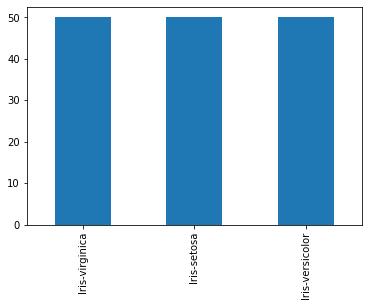

In [21]:
iris["Species"].value_counts().plot(kind="bar")

In [22]:
iris[["Species","PetalLengthCm"]].groupby("Species").mean()

PetalLengthCm
Species                       
Iris-setosa              1.464
Iris-versicolor          4.260
Iris-virginica           5.552

<AxesSubplot:xlabel='Species'>

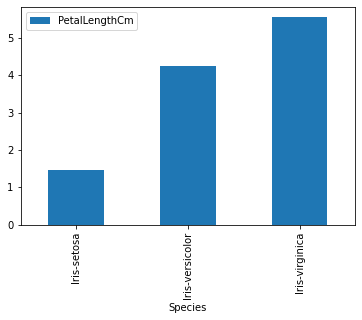

In [23]:
iris[["Species","PetalLengthCm"]].groupby("Species").mean().plot(kind="bar")

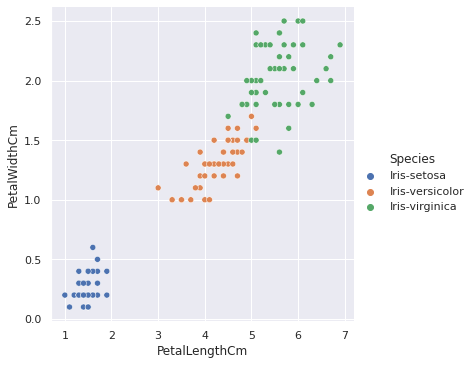

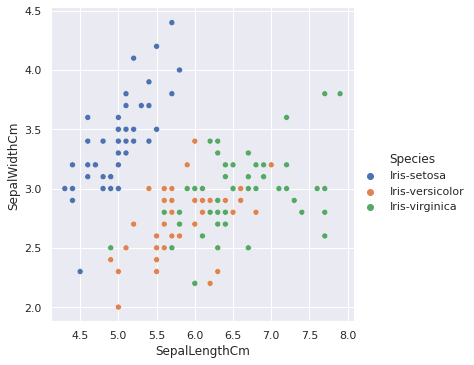

In [24]:
import seaborn as sns
sns.set_theme()
sns.relplot(data=iris, x="PetalLengthCm", y="PetalWidthCm", hue="Species")
sns.relplot(data=iris, x="SepalLengthCm", y="SepalWidthCm", hue="Species")

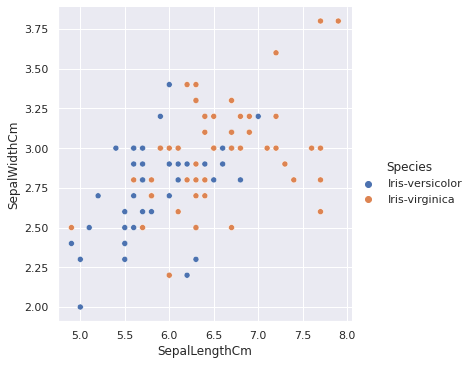

In [25]:
irisv = iris[iris["Species"] !=  "Iris-setosa"]
sns.relplot(data=irisv, x="SepalLengthCm", y="SepalWidthCm", hue="Species")

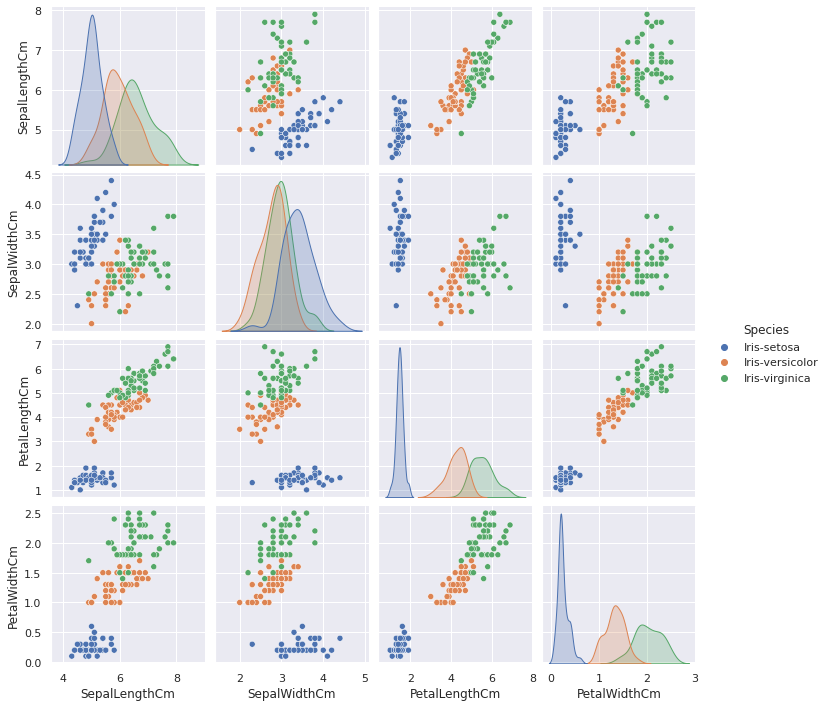

In [26]:
sns.pairplot(data=iris.drop(columns=["Id"]), hue="Species")

# Podział danych
 - ### Zbiór trenujący ("training set")
  - Służy do dopasowania parametrów modelu (np. wag w sieci neuronowej).
  - Podczas trenowania algorytm minimalizuje funkcję kosztu obliczoną na zbiorze treningowym 
 - ### Zbiór walidujący/walidacyjny ("validation set" aka. "dev set")
  - Służy do porównania modeli powstałych przy użyciu różnych hiperparametrów (np. architektura sieci, ilość iteracji trenowania)
  - Pomaga uniknąć przetrenowania (overfitting) modelu na zbiorze trenującym poprzez zastosowanie tzw. early stopping
 - ### Zbiór testujący ("test set")
  - Służy do ewaluacji finalnego modelu wybranego/wytrenowanego za pomocą zbiorów trenującego i walidującego

## Podział danych
- Zbiory trenujący, walidacyjny i testowy powinny być niezależne, ale pochodzić z tego samego rozkładu
- W przypadku klasyfikacji, rozkład klas w zbiorach powinien być zbliżony
- Bardzo istotne jest to, żeby zbiory walidujący i testujący dobrze odzwierciedlały nasze cele biznesowe i rzeczywiste dane, na których będzie działał nasz model


### Metody podziału:
- Skorzystać z gotowego podziału danych :)
- Jeśli dzielimy zbiór sami:
  - "Klasyczne" podejście: proporcja Train:Dev:Test 6:2:2 lub 8:1:1
  - Uczenie głębokie: 
    - metody "głębokie" mają bardzo duże zapotrzebowanie na dane, zbiory rzędu > 1 000 000 przykładów
    - Załóżmy, że cały zbiór ma 1 000 000 przykładów
    - wielkości zbiorów dev i test ustalamy bezwzględnie, np. na 1000 albo 10 000 przykładów
    - 10 000 przykładów to (wystarczająco) dużo, choć stanowi jedynie 1% z całego zbioru
    - szkoda "marnować" dodatkowe 180 000 przykładów na zbiory testujące i walidacyjne, lepiej mieć większy zbiór trenujący 


### Przykładowy podział z pomocą standardowych narzędzi Bash

In [27]:
# Pobierzmy plik ze zbiorem z repozytorium
!cd IUM_02; wget -c https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data

--2021-03-15 11:16:36--  https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 416 Requested Range Not Satisfiable

    The file is already fully retrieved; nothing to do.



In [29]:
#Sprawdźmy wielkość zbioru
!wc -l IUM_02/iris.data

151 IUM_02/iris.data


In [30]:
#Sprawdźmy strukturę
!head -n 5 IUM_02/iris.data

5.1,3.5,1.4,0.2,Iris-setosa
4.9,3.0,1.4,0.2,Iris-setosa
4.7,3.2,1.3,0.2,Iris-setosa
4.6,3.1,1.5,0.2,Iris-setosa
5.0,3.6,1.4,0.2,Iris-setosa


In [31]:
#Sprawdźmy jakie są klasy i ile każda ma przykładów:
!cut -f 5 -d "," IUM_02/iris.data | sort | uniq -c

      1 
     50 Iris-setosa
     50 Iris-versicolor
     50 Iris-virginica


In [32]:
# Znajdźmy pustą linijkę:
! grep -P "^$" -n IUM_02/iris.data

151:


In [33]:
#Usuwamy pustą linijkę i tasujemy plik:
! head -n -1 IUM_02/iris.data | shuf > IUM_02/iris.data.shuf
# Dzielimy zbiór w proporcji 4:1:1
!head -n 25 IUM_02/iris.data.shuf > IUM_02/iris.data.test
!head -n 50 IUM_02/iris.data.shuf | tail -n 25 > IUM_02/iris.data.dev
!tail -n +51 IUM_02/iris.data.shuf > IUM_02/iris.data.train
!rm IUM_02/iris.data.shuf
#Sprawdźmy, czy wielkości się zgadzają:
!wc -l IUM_02/iris.data*

 151 IUM_02/iris.data
  25 IUM_02/iris.data.dev
  25 IUM_02/iris.data.test
 100 IUM_02/iris.data.train
 301 total


In [34]:
!cut -f 5 -d "," IUM_02/iris.data.train | sort | uniq -c

     33 Iris-setosa
     36 Iris-versicolor
     31 Iris-virginica


In [35]:
!cut -f 5 -d "," IUM_02/iris.data.dev | sort | uniq -c

      7 Iris-setosa
      9 Iris-versicolor
      9 Iris-virginica


In [36]:
!cut -f 5 -d "," IUM_02/iris.data.test | sort | uniq -c

     10 Iris-setosa
      5 Iris-versicolor
     10 Iris-virginica


### Podział z pomocą sckikit learn
- Do podziału możemy też użyć biblioteki https://scikit-learn.org/

In [45]:
from sklearn.model_selection import train_test_split
iris_train, iris_test = sklearn.model_selection.train_test_split(iris, test_size=50, random_state=1)
iris_train["Species"].value_counts()

Iris-virginica     36
Iris-setosa        33
Iris-versicolor    31
Name: Species, dtype: int64

In [46]:
iris_test["Species"].value_counts()

Iris-versicolor    19
Iris-setosa        17
Iris-virginica     14
Name: Species, dtype: int64

In [48]:
from sklearn.model_selection import train_test_split
iris_train, iris_test = sklearn.model_selection.train_test_split(iris, test_size=50, random_state=1, stratify=iris["Species"])
iris_train["Species"].value_counts()

Iris-setosa        34
Iris-virginica     33
Iris-versicolor    33
Name: Species, dtype: int64

In [49]:
iris_test["Species"].value_counts()

Iris-virginica     17
Iris-versicolor    17
Iris-setosa        16
Name: Species, dtype: int64

# Preprocessing danych
- Czyszczenie
  - usuwanie ze zbioru przykładów nieprawidłowych
  - korekta nieprawidłowych wartości
- Normalizacja
  - Dane numeryczne: skalowanie do zakresu, np. \[0.0, 1.0\] (https://scikit-learn.org/stable/modules/preprocessing.html)
  - Dane tekstowe: lowercase, ujednolicenie wariantów pisowni, normalizacja wyrażeń numerycznych
  - Dane obrazowe: normalizacja rozdzielczości, palety kolorów
  - Dane dźwiękowe: normalizacja natężenia, rozdzielczości, częstotliwości próbkowania, ilości kanałów
- Poszerzanie (augumentacja) danych
  - Generowanie nowych przykładów przez wprowadzanie szumu/przekształceń na originalnych danych
  - np. dodanie echa do nagrania dźwiękowego
  - zmiana wartości cech o względnie małe, losowe wartości 
- Over/under-sampling
  - Algorymty uczące i metryki mogą być wrażliwe na niezbalansowane klasy w zbiorze
  - Np. jeśli w zbiorze są 2 klasy w propocji 9:1, to najprostszy "klasyfikator" bez problemy osiągnie accuracy 90%
  - Najprostszy sposób: skopiujmy (albo usuńmy) część przykładów zwiększając (lub zmniejszając) dany zbiór

# Zadanie [5pkt]
- Wybierz jeden z ogólnodostępnych zbiorów danych. Będziesz na nim pracował do końca roku (oczywiście, zbiór można zmienić w trakcie, ale będzie się to wiązało z powtarzeniem pewnych działań, co prawdwa niezbyt kosztownych, ale jednak).
- Zbiór powinien być:
 - nie za duży (max 10-20 MB)
 - nie za mały (np. IRIS jest za mały ;))
 - unikalny (każda osoba w grupie pracuje na innym zbiorze). W celu synchronizacji, wybrany przez siebie zbiór proszę zapisać tutaj: https://uam.sharepoint.com/:x:/s/2021SL06-DIUMUI0LABInynieriauczeniamaszynowego-Grupa11/EYhZK_aXp41BsIVS4K-L1V4B_vM2FjO5nJZMWv2QKXJolA?e=DKIS2O
 - najlepiej, żeby był to zbiór zawierający dane w formie tekstowej, mogący posłużyć do zadania klasyfikacji lub rergesji - na takim zbiorze będzie łatwiej pracować niż np. na zbiorze obrazów albo dźwięków. Dzięki temu będziesz się mogła/mógł skupić na istocie tych zajęć.

- Napisz skrypt, który:
1. Pobierze wybrany przez Ciebie zbiór
2. Jeśli brak w zbiorze gotowego podziału na podzbiory train/dev/test, to dokona takiego podziału
2. Zbierze i wydrukuje statystyki dla tego zbioru i jego podzbiorów, takie jak np.:
 - wielkość zbioru i podzbiorów
 - średnią, minimum, maksimum, odchylenia standardowe, medianę wartości poszczególnych parametrów)
 - rozkład częstości przykładów dla poszczególnych klas
4. Dokona normalizacji danych w zbiorze (np. normalizacja wartości float do zakresu 0.0 - 1.0)
5. Wyczyści zbiór z artefaktów (np. puste linie, przykłady z niepoprawnymi wartościami)

- Skrypt możesz napisać w swoim ulubionym języku. Jedyne ograniczenie: ma działać pod Linuxem
- Wygodnie będzie stworzyć zeszyt Jupyter w tym celu (choć nie jest to konieczne)
- Stwórz na wydziałowym serwerze git (http://git.wmi.amu.edu.pl/) repozytorium "ium_nrindeksu" i umieść w nim stworzony skrypt
- Link do repozytorium wklej do arkusza ze zbiorami (https://uam.sharepoint.com/:x:/s/2021SL06-DIUMUI0LABInynieriauczeniamaszynowego-Grupa11/EYhZK_aXp41BsIVS4K-L1V4B_vM2FjO5nJZMWv2QKXJolA?e=DKIS2O)


# Bibliografia
 - https://www.coursera.org/learn/machine-learning-projects 
 - https://see.stanford.edu/materials/aimlcs229/ML-advice.pdf
